<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/CRM_analysis_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case: CRM analysis for Online store - RFM Analysis

The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store
online retail business based and registered in the UK. Specializing in distinctive
all-occasion gifts, the company's clientele includes a significant number of wholesale
customers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson,expon, geom, binom, ttest_1samp, ttest_ind, ttest_rel, chi2,chi2_contingency, chi2, chisquare, f_oneway, levene, shapiro, kruskal
import math
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!gdown 1jTuWZ5Wwrb313G5JBl79UT2bdl1p9WQo

Downloading...
From: https://drive.google.com/uc?id=1jTuWZ5Wwrb313G5JBl79UT2bdl1p9WQo
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 90.5MB/s]


In [ ]:
df=pd.read_csv("/content/Ecom_CRM_analysis.csv",parse_dates=True,encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df_cleaned = df

df_cleaned['Description'] = df_cleaned.groupby('StockCode')['Description'].ffill().bfill()

# Fill missing CustomerID based on InvoiceNo (assuming same InvoiceNo has the same CustomerID)
df_cleaned['CustomerID'] = df_cleaned.groupby('InvoiceNo')['CustomerID'].ffill().bfill()

# Display the cleaned DataFrame
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_cleaned.shape

(541909, 8)

In [ ]:
df_cleaned.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [ ]:
df=df_cleaned

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df[df.duplicated()].head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,12/1/2010 11:49,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,12/1/2010 11:49,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,12/1/2010 11:49,3.75,17920.0,United Kingdom


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641,536641,536641,536641.000000,536641,536641.000000,536641.000000,536641
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2301,2357,NaN,1114,NaN,NaN,490300
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15270.387231,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1719.444122,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13883.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15117.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16775.000000,NaN


In [ ]:
df.shape

(536641, 8)

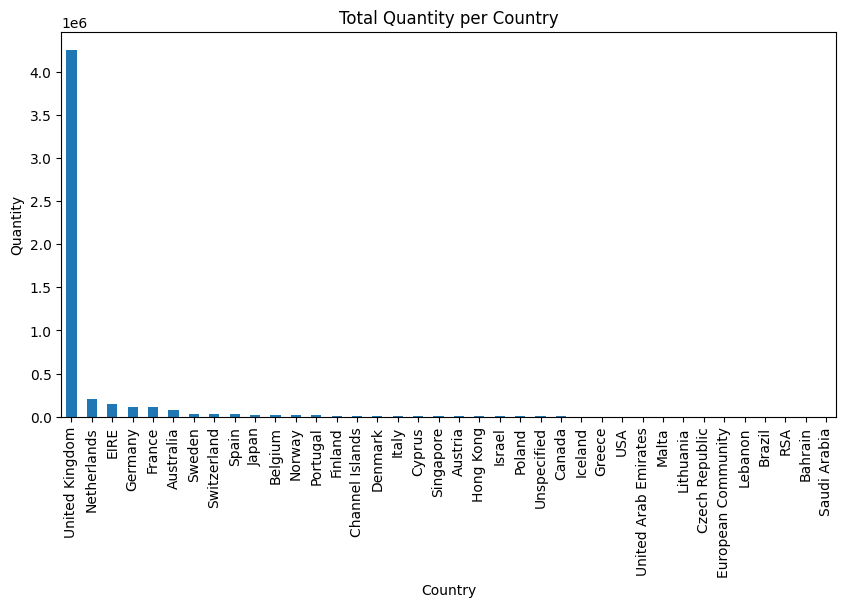

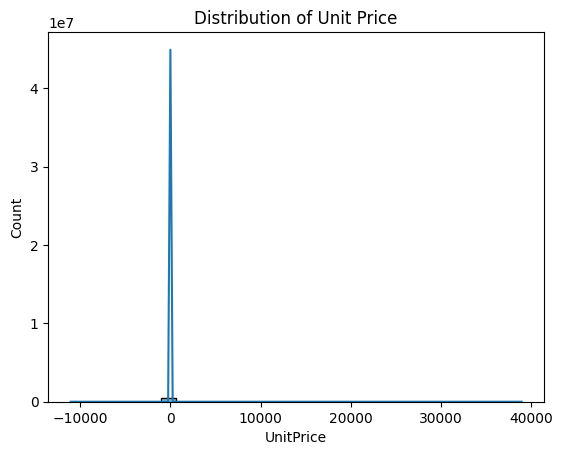

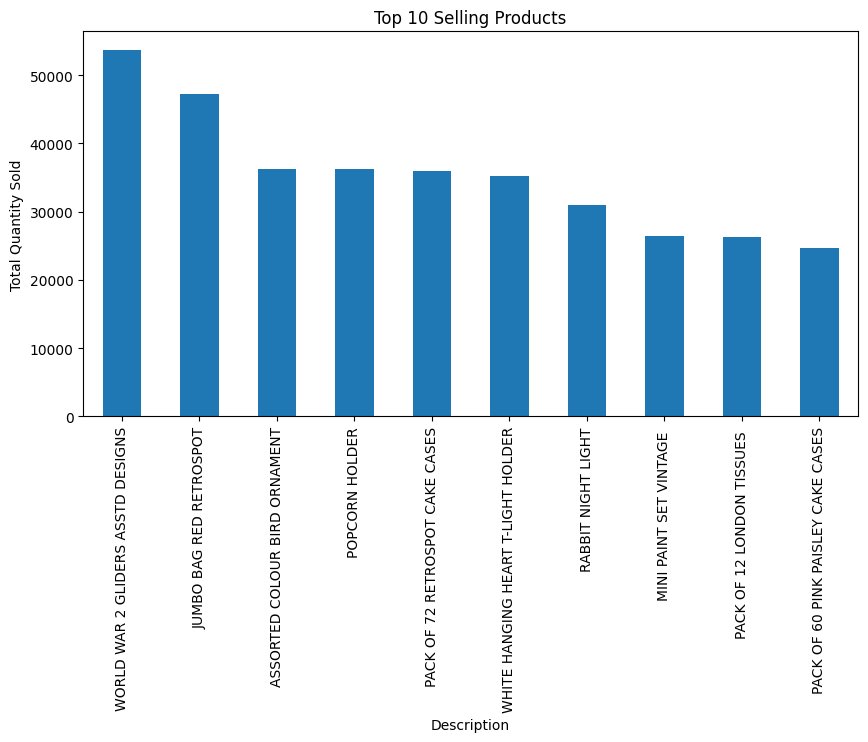

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,324,2,2.08
12347.0,1,183,481.21
12348.0,74,31,178.71
12349.0,17,74,605.10
12350.0,309,17,65.30


In [ ]:
df_cleaned.describe()

df_cleaned.isnull().sum()

# Plot total quantity per country
df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Total Quantity per Country')
plt.ylabel('Quantity')
plt.show()

# Distribution of UnitPrice
sns.histplot(df_cleaned['UnitPrice'], bins=30, kde=True)
plt.title('Distribution of Unit Price')
plt.show()

# Top 10 selling products
df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Selling Products')
plt.ylabel('Total Quantity Sold')
plt.show()
# """

# RFM analysis code
import datetime as dt
now = dt.datetime(2011, 12, 10) # Using a date from data as reference

# Aggregate the data by CustomerID
rfm_df = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime('2011-12-09') - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': lambda x: sum(x)
})

# Rename the columns
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

# Remove entries with negative or zero monetary value
rfm_df = rfm_df[rfm_df['Monetary'] > 0]

# Display the head of the RFM table
rfm_df.head()
# """

# Display EDA and RFM analysis code as requested
# eda_code + rfm_code


In [ ]:
rfm_df.shape

(4370, 3)

In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4370.000000,4370.000000,4370.000000
mean,90.606865,122.778032,571.351578
std,100.787007,296.968205,2032.464218
min,-1.000000,1.000000,0.170000
25%,15.000000,18.000000,55.782500
50%,49.000000,45.000000,144.095000
75%,142.000000,122.000000,383.870000
max,372.000000,8397.000000,47862.120000


In [ ]:
rfm_df['Recency_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5,4,3,2,1])
rfm_df['Frequency_Score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[5,4,3,2,1])
rfm_df['Monetary_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1,2,3,4,5])
rfm_df['rfm_Score'] = (rfm_df['Recency_Score']).astype(int) * (rfm_df['Frequency_Score']).astype(int) * (rfm_df['Monetary_Score']).astype(int)
rfm_df.head()

temp_points=[0,25,50,75,100,126]
temp_labels = ['Lost', 'Hibernating', 'Need_Attention','Potential_Loyalist', 'Loyal_customer']
rfm_df['rfm_Score_label'] = pd.cut(rfm_df['rfm_Score'], bins=temp_points , labels=temp_labels)

# rfm_df['rfm_Score_label'] = pd.qcut(rfm_df['rfm_Score'], 5, labels=['Low_priority', 'Below_Average_Customer', 'Average_customer','Loyal_customer', 'Very_Loyal_customer'])
# rfm_df['rfm_Score_label'] = pd.qcut(rfm_df['rfm_Score'], 5, labels=[1,2,3,4,5])

In [ ]:
rfm_df.head(10)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,rfm_Score,rfm_Score_label
CustomerID,,,,,,,,
12346.0,324,2,2.08,1,5,1,5,Lost
12347.0,1,183,481.21,5,1,4,20,Lost
12348.0,74,31,178.71,2,4,3,24,Lost
12349.0,17,74,605.10,4,2,5,40,Hibernating
12350.0,309,17,65.30,1,4,2,8,Lost
12352.0,35,95,2211.10,3,2,5,30,Hibernating
12353.0,203,4,24.30,1,5,1,5,Lost
12354.0,231,59,261.22,1,3,4,12,Lost
12355.0,213,13,54.65,1,5,2,10,Lost


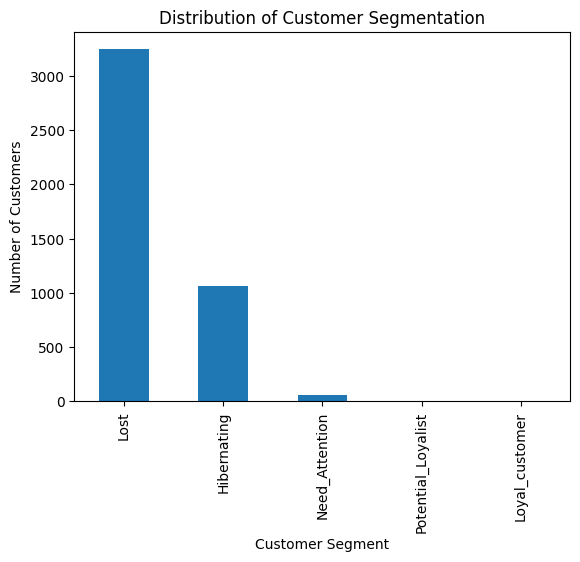

In [ ]:
rfm_df['rfm_Score_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer Segmentation')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
rfm_df.reset_index(inplace=True)


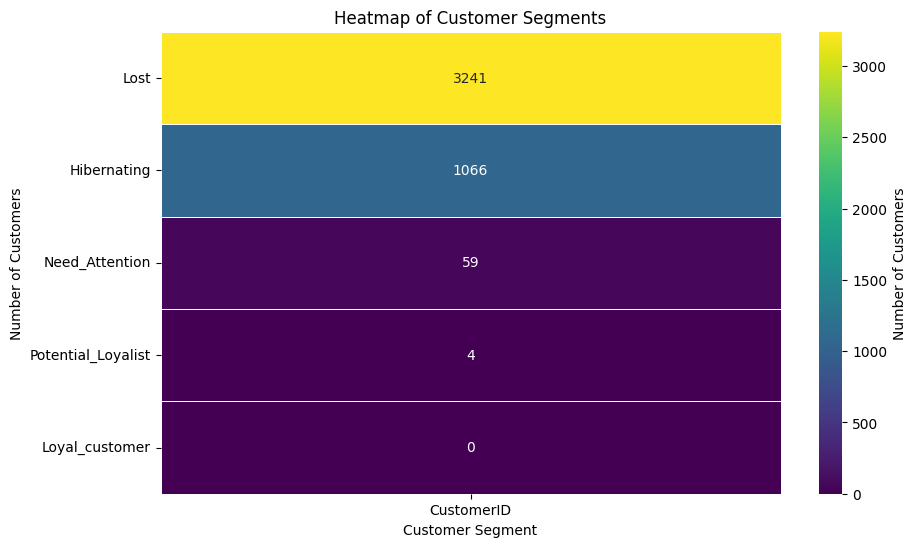

In [ ]:
# prompt: create heat map  for rfm_Score_label column values. Do pd.pivot if required and create heatmap for it. Also size of box should be as per count

heatmap_data = pd.pivot_table(rfm_df, values='CustomerID', index=['rfm_Score_label'], aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Number of Customers'}, linewidths=.5)
plt.title('Heatmap of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()


##Insight:

We have good count of customer, Who need attention and can be converted loyal customer.


In [ ]:
cat_cols=['InvoiceNo',	'StockCode', 'Description','CustomerID','Country']
# num_cols=['UnitPrice', 'Quantity', 'InvoiceDate']
num_cols=['UnitPrice', 'Quantity']

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


In [ ]:
df['Revenue']=df['UnitPrice']*df['Quantity']

#Univariate and Bivarient Analysis

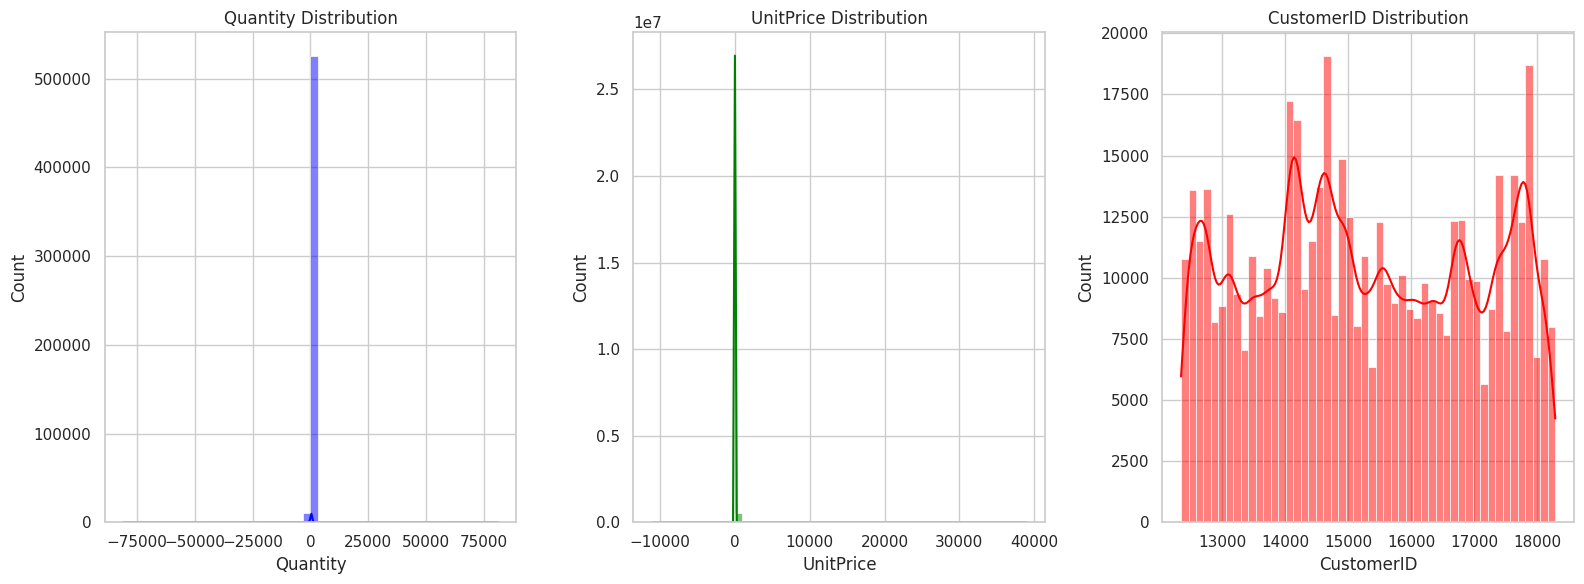

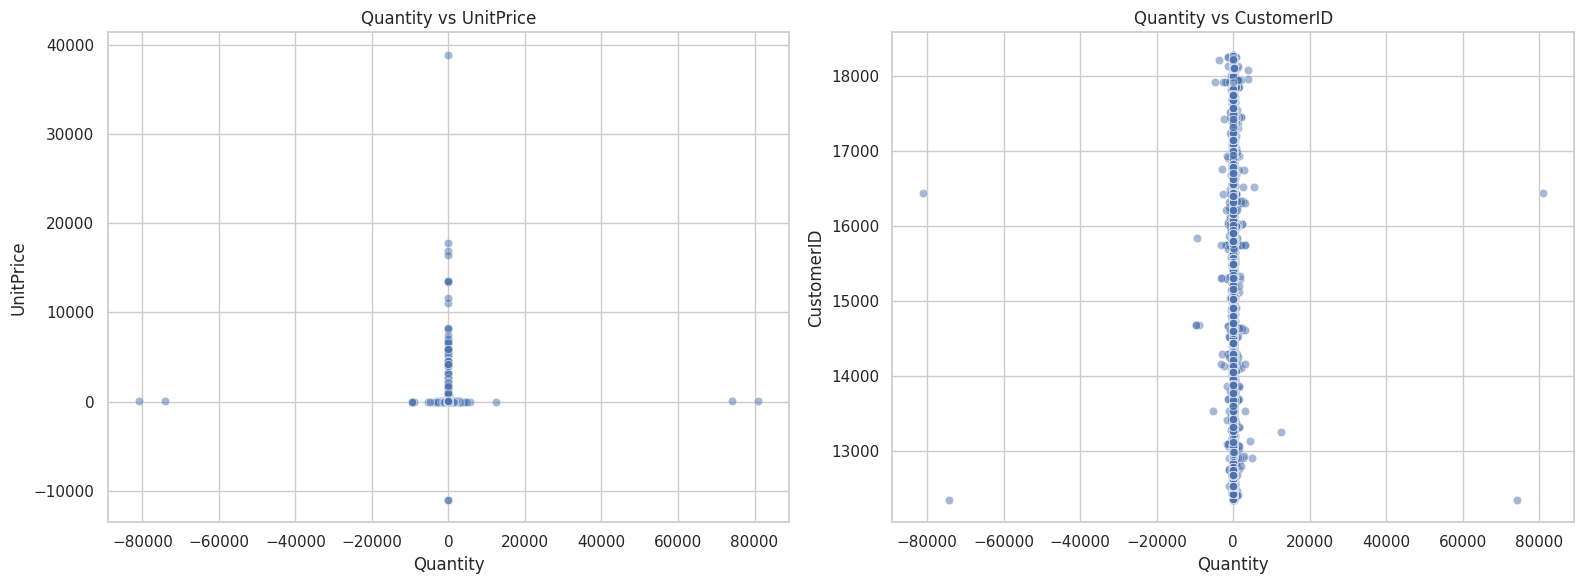

In [ ]:

data = df
# Set the style of seaborn
sns.set(style="whitegrid")

# Univariate plots
plt.figure(figsize=(16, 6))

# Quantity distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Quantity'], bins=50, kde=True, color='blue')
plt.title('Quantity Distribution')

# UnitPrice distribution
plt.subplot(1, 3, 2)
sns.histplot(data['UnitPrice'], bins=50, kde=True, color='green')
plt.title('UnitPrice Distribution')

# CustomerID distribution
plt.subplot(1, 3, 3)
sns.histplot(data['CustomerID'].dropna(), bins=50, kde=True, color='red')
plt.title('CustomerID Distribution')

plt.tight_layout()
plt.show()

# Bivariate plots (scatterplots for correlations)
plt.figure(figsize=(16, 6))

# Quantity vs UnitPrice
plt.subplot(1, 2, 1)
sns.scatterplot(x='Quantity', y='UnitPrice', data=data, alpha=0.5)
plt.title('Quantity vs UnitPrice')

# Quantity vs CustomerID
plt.subplot(1, 2, 2)
sns.scatterplot(x='Quantity', y='CustomerID', data=data, alpha=0.5)
plt.title('Quantity vs CustomerID')

plt.tight_layout()
plt.show()


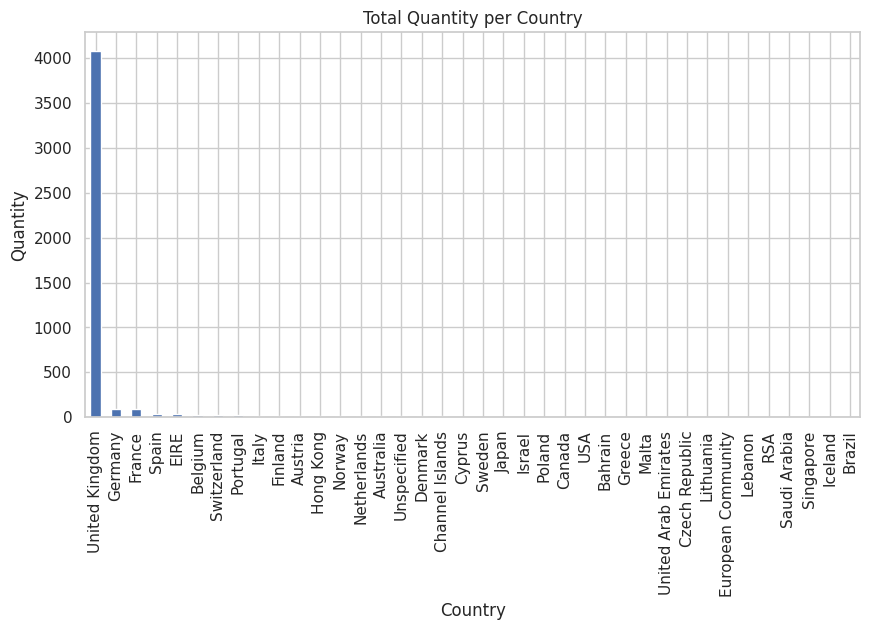

In [ ]:
df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Total Quantity per Country')
plt.ylabel('Quantity')
plt.show()

Text(0, 0.5, 'Total Quantity Sold')

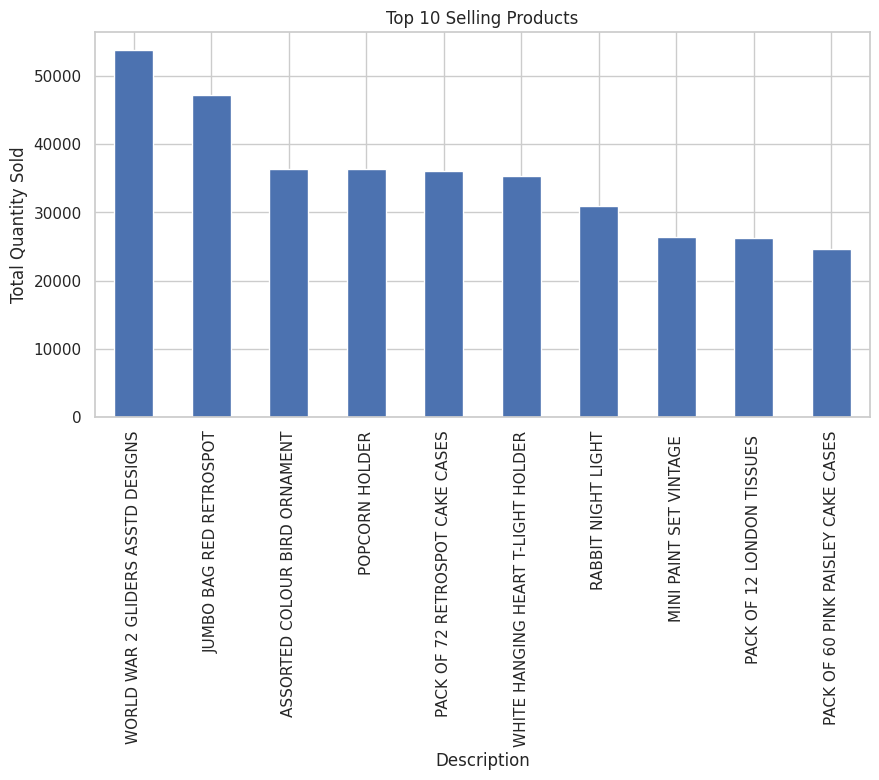

In [ ]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Selling Products')
plt.ylabel('Total Quantity Sold')

Text(0, 0.5, 'Total Revenue')

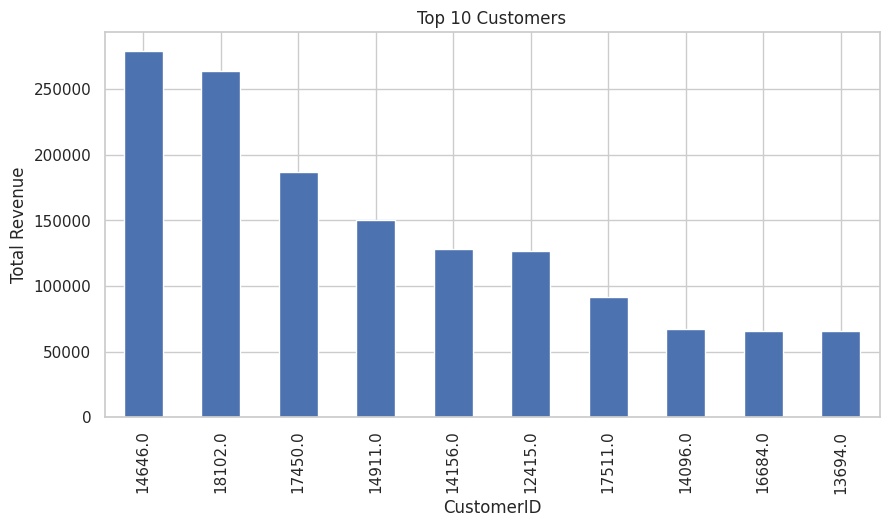

In [ ]:
df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Customers')
plt.ylabel('Total Revenue')

In [ ]:
df['month']=df['InvoiceDate'].dt.month

<Axes: xlabel='month', ylabel='Revenue'>

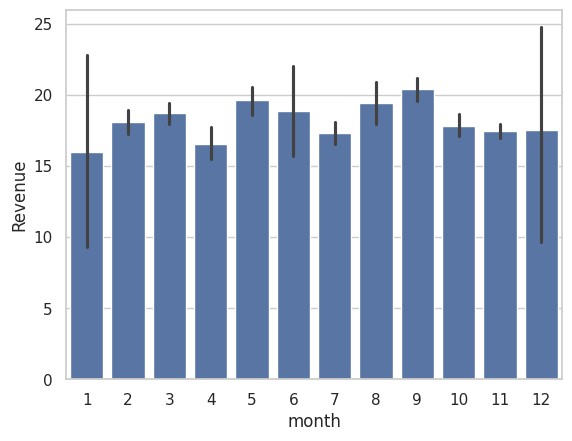

In [ ]:
sns.barplot(x=df['month'],y=df['Revenue'],data=df)

In [ ]:
df['isReturned']=df['Quantity'].apply(lambda x: 1 if x<0 else 0)

<Axes: xlabel='month'>

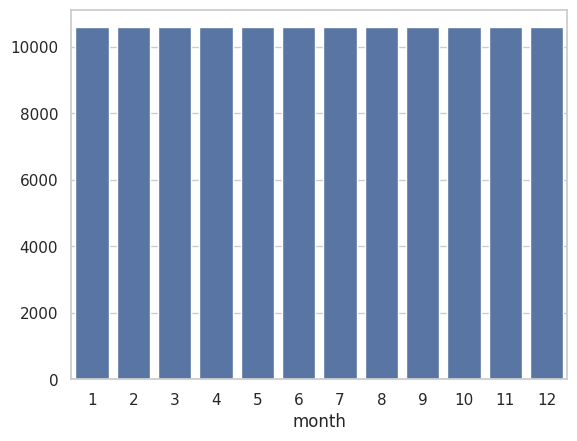

In [ ]:
sns.barplot(x=df['month'],y=df['isReturned'].sum(),data=df)

Link: [PPT Link](https://drive.google.com/file/d/1zVoEt93cnf_7gFOQOCYX9ooXxasEpIRC/view?usp=sharing)